**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [6]:
# Import the dataset
df = pd.read_csv('C:\\Users\\hp\\Project-Data-Set-Repository\\Data set\\cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [9]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_feats = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [20]:
df[bill_feats].describe() 

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [21]:
df[bill_feats[0]].value_counts().sort_index()

-165580    1
-154973    1
-15308     1
-14386     1
-11545     1
          ..
 613860    1
 621749    1
 630458    1
 653062    1
 746814    1
Name: BILL_AMT1, Length: 20519, dtype: int64

In [29]:
bill_1_bins = np.array(range(-2,18)) - 0.5
bill_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE1878B5C8>,
      dtype=object)

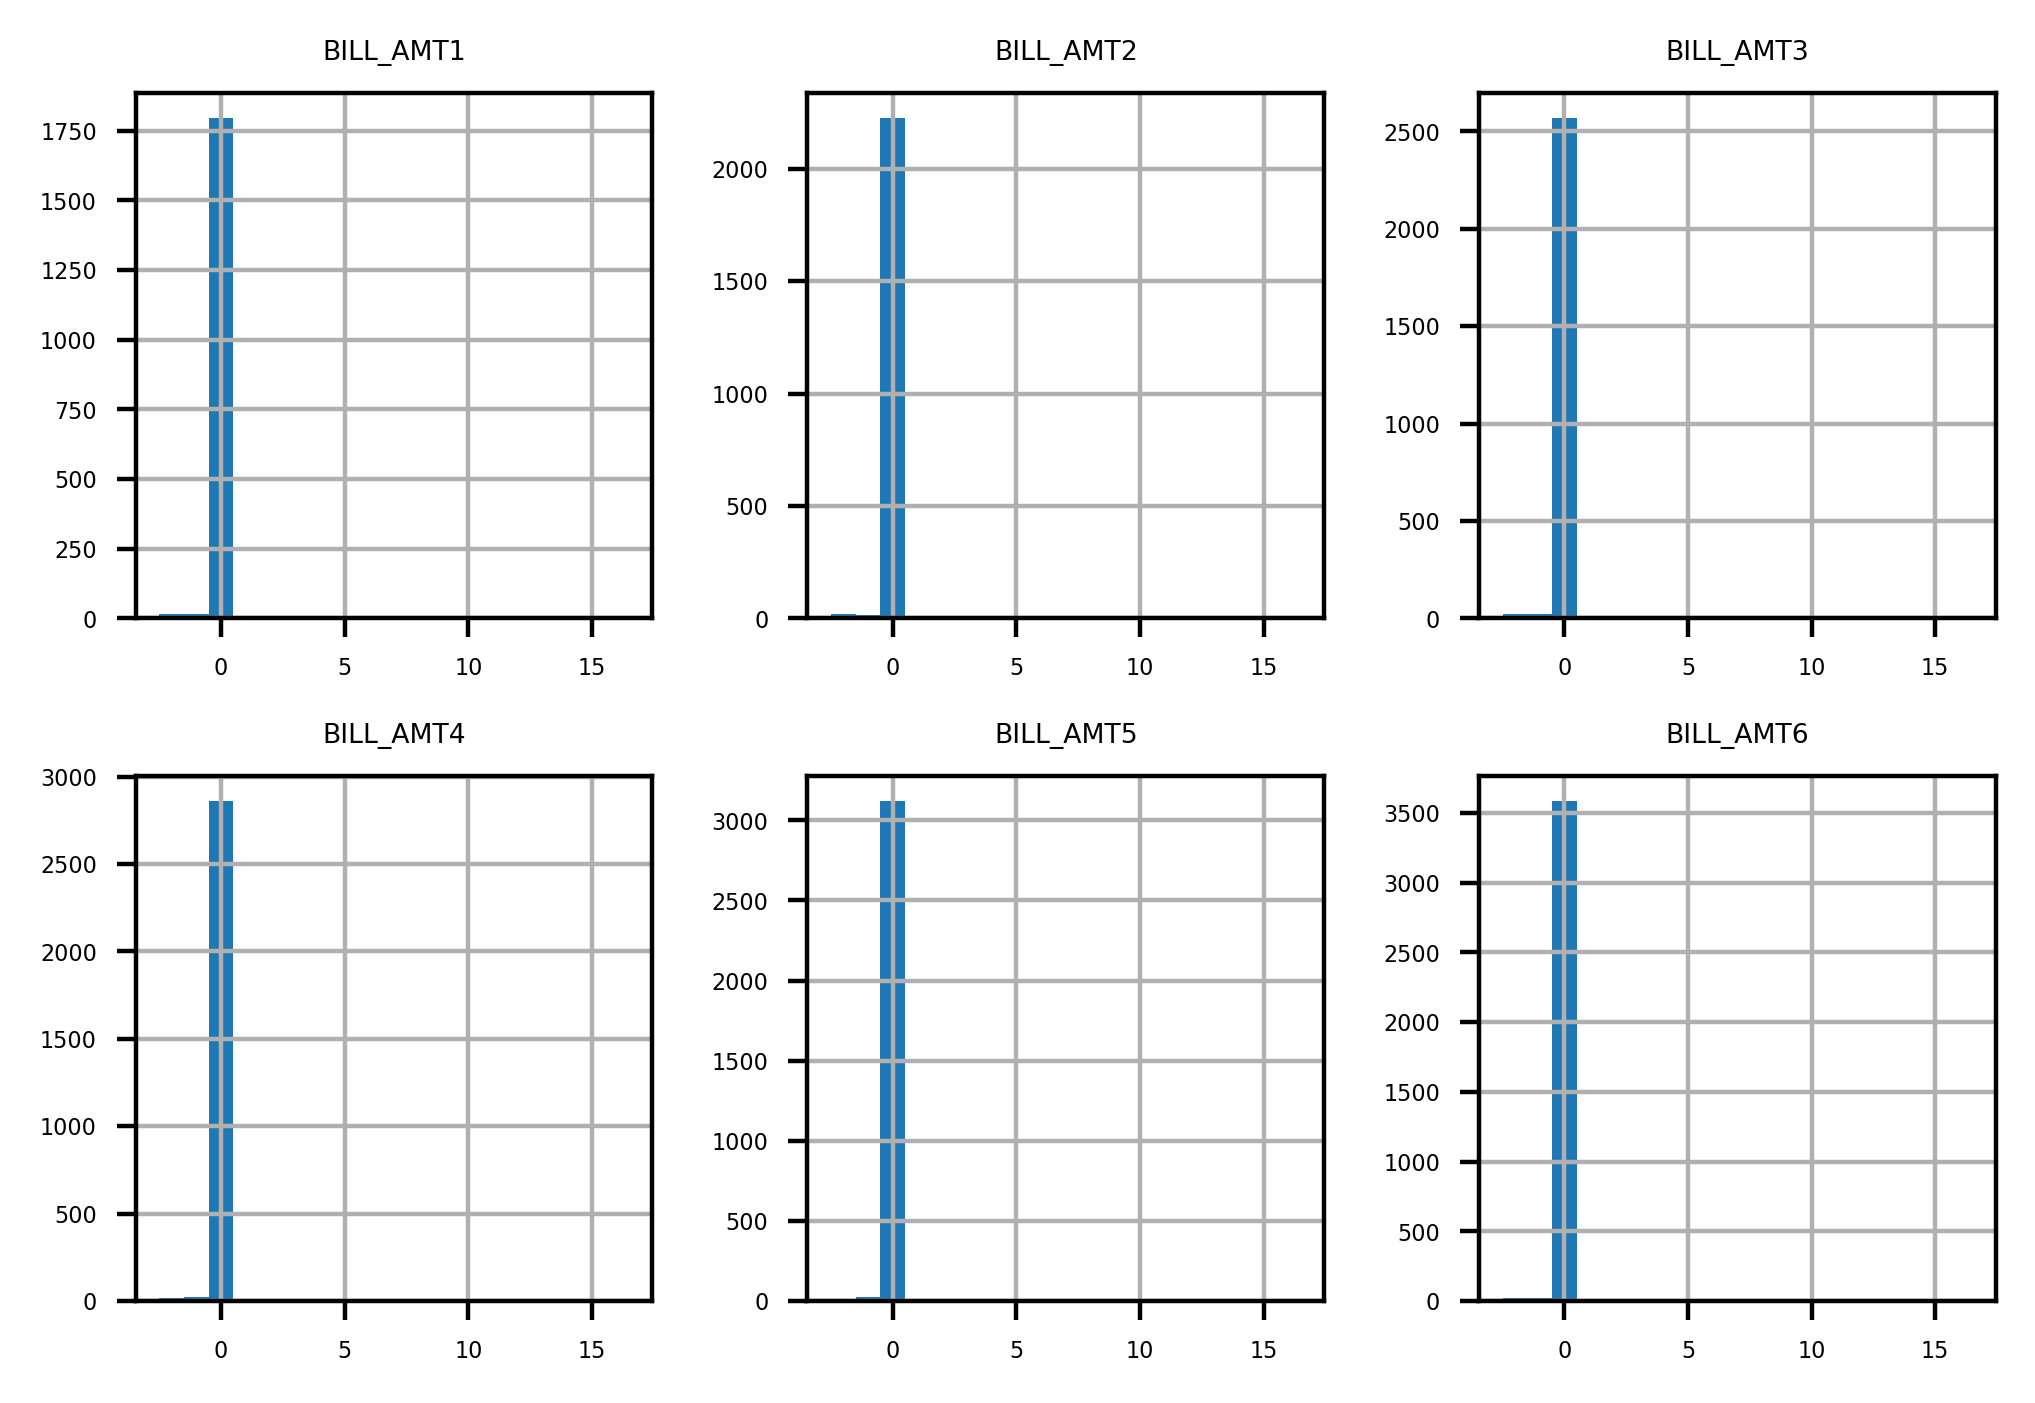

In [30]:
mpl.rcParams['font.size'] = 4
df[bill_feats].hist(bins=bill_1_bins, layout=(2,3))

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [31]:
df[pay_amt_feats].describe() 

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE1C65BA88>,
      dtype=object)

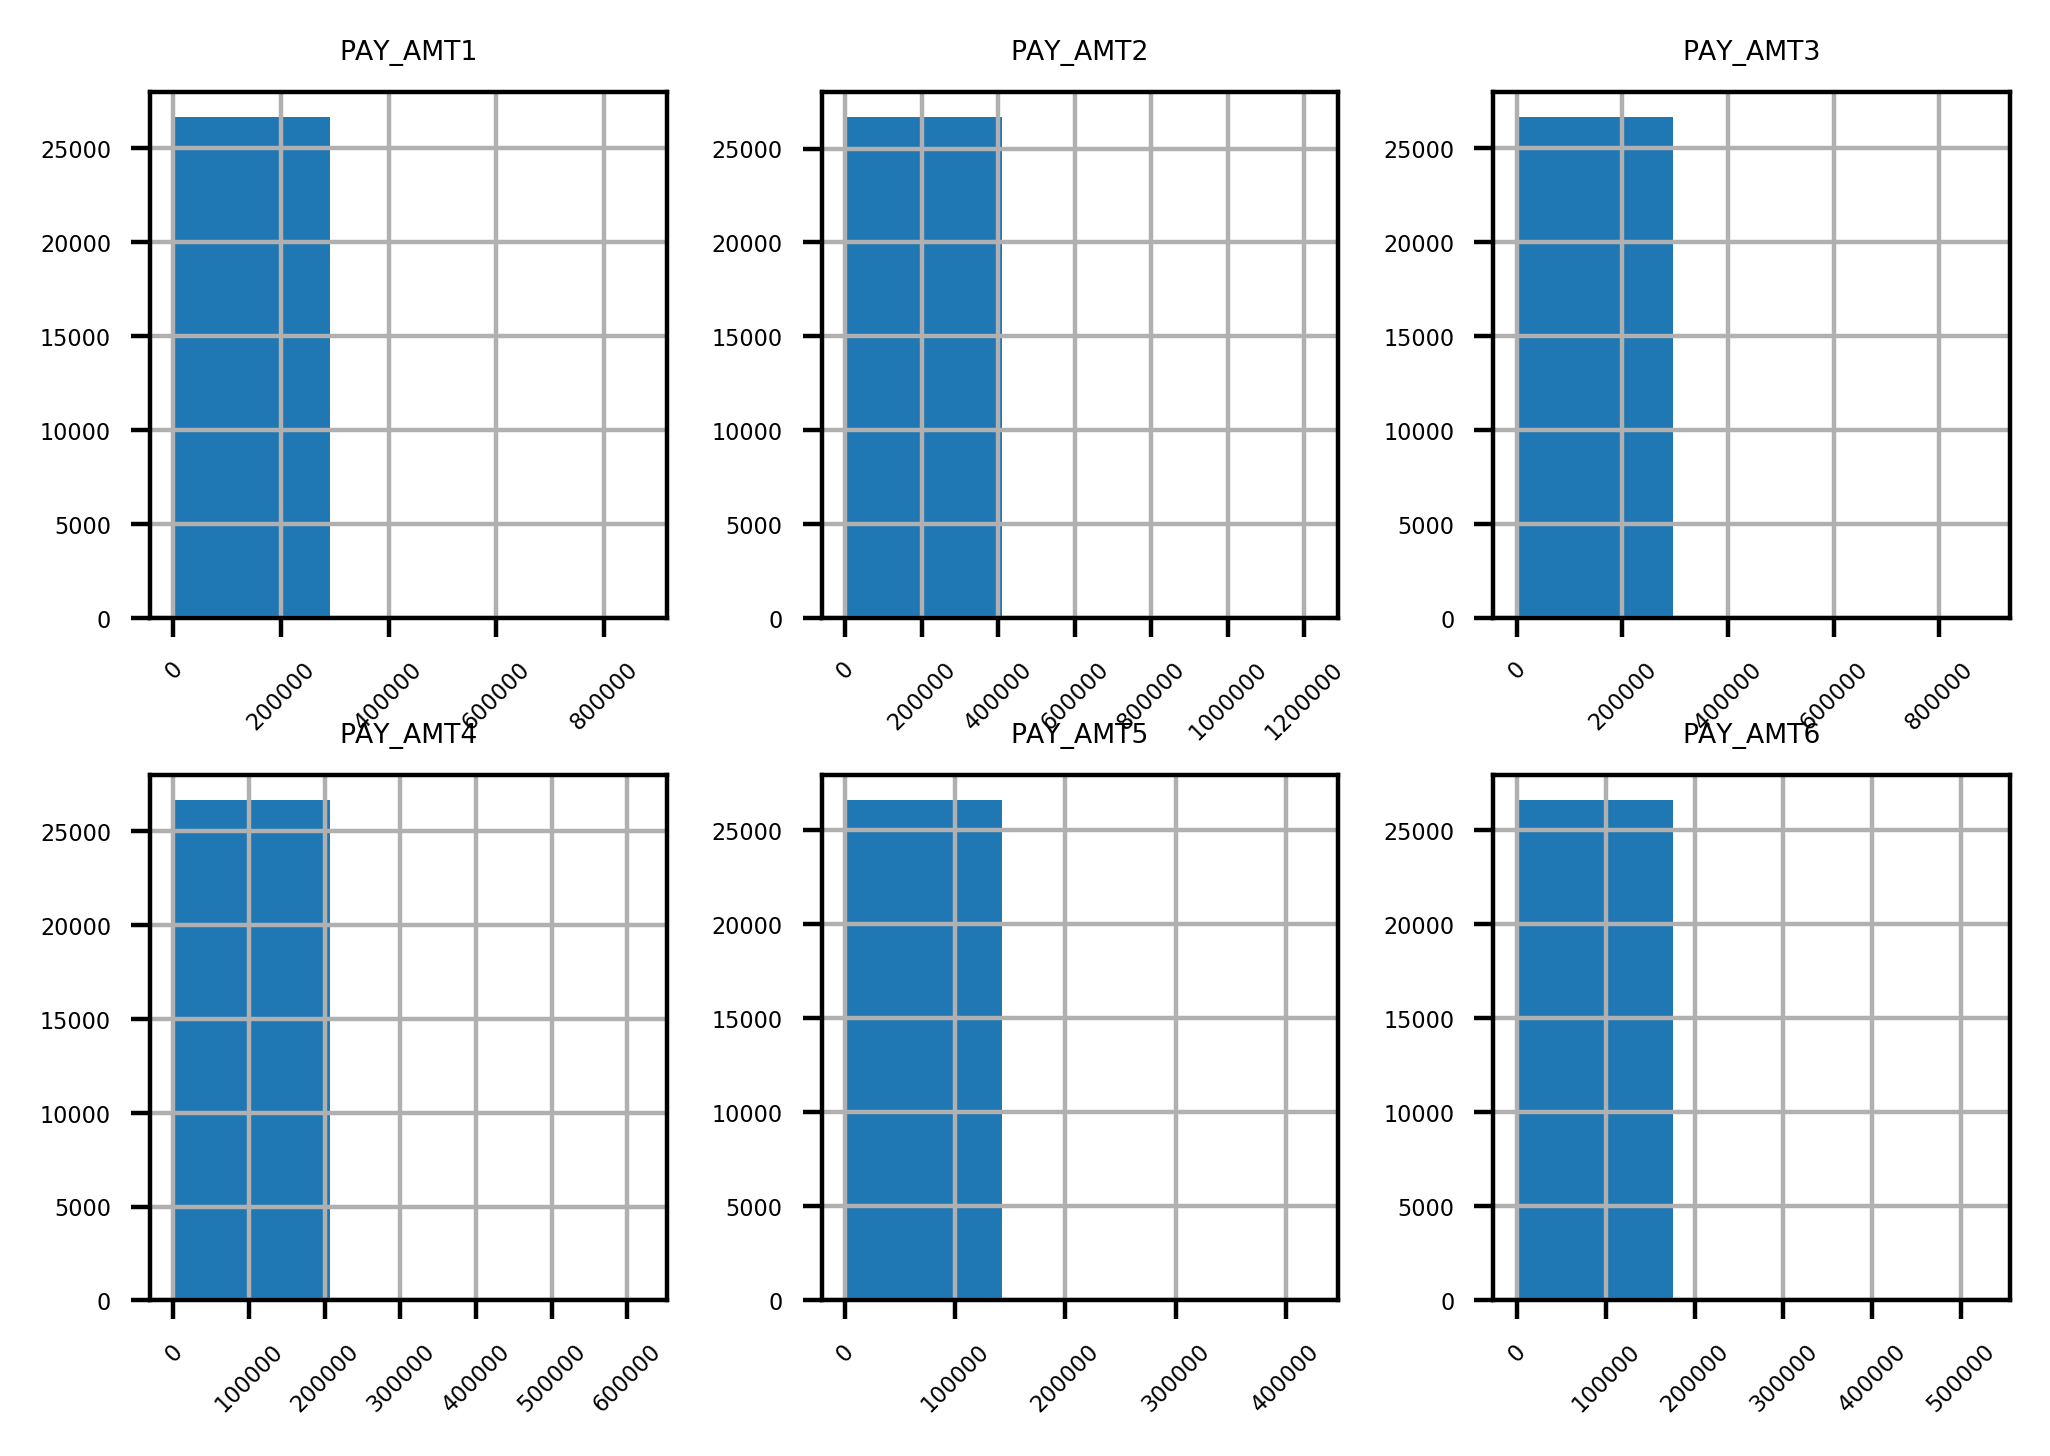

In [33]:
mpl.rcParams['font.size'] = 4
df[pay_amt_feats].hist(bins=3, layout=(2,3), xrot = 45)

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [38]:
# Create Boolean mask
pay_amt_count = df['PAY_AMT1'].value_counts()
duplicate = pay_amt_count == 2
duplicate[0:5]

0       False
2000    False
3000    False
5000    False
1500    False
Name: PAY_AMT1, dtype: bool

In [40]:
# Use `.head()`
dupe_pay = pay_amt_count.index[duplicate]
dupe_pay = list(dupe_pay)
len(dupe_pay)
dupe_pay[:5]
df.loc[df['PAY_AMT1'].isin(dupe_pay[0:3]),:].head(5) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
2073,a8fd15d5-de0e,30000,2,2,1,26,0,0,0,-1,...,6712,0,2780,0,0,university,0,0,0,1
4636,8cf53bf6-52f3,30000,2,3,1,45,-2,-2,-2,-2,...,2072,4072,0,0,0,high school,0,1,0,0
9651,e6456b2d-cd4b,20000,2,1,2,25,0,0,0,-1,...,1040,800,0,0,0,graduate school,1,0,0,0
14783,8dc9b3d0-55e8,240000,1,1,2,41,0,0,0,0,...,3000,982,3437,2044,0,graduate school,1,0,0,0
19978,4e4a8fe3-e303,70000,2,2,1,48,-1,-1,-1,-1,...,4292,0,930,1422,0,university,0,0,0,1


In [41]:
# Use `.sum()`
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

0

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

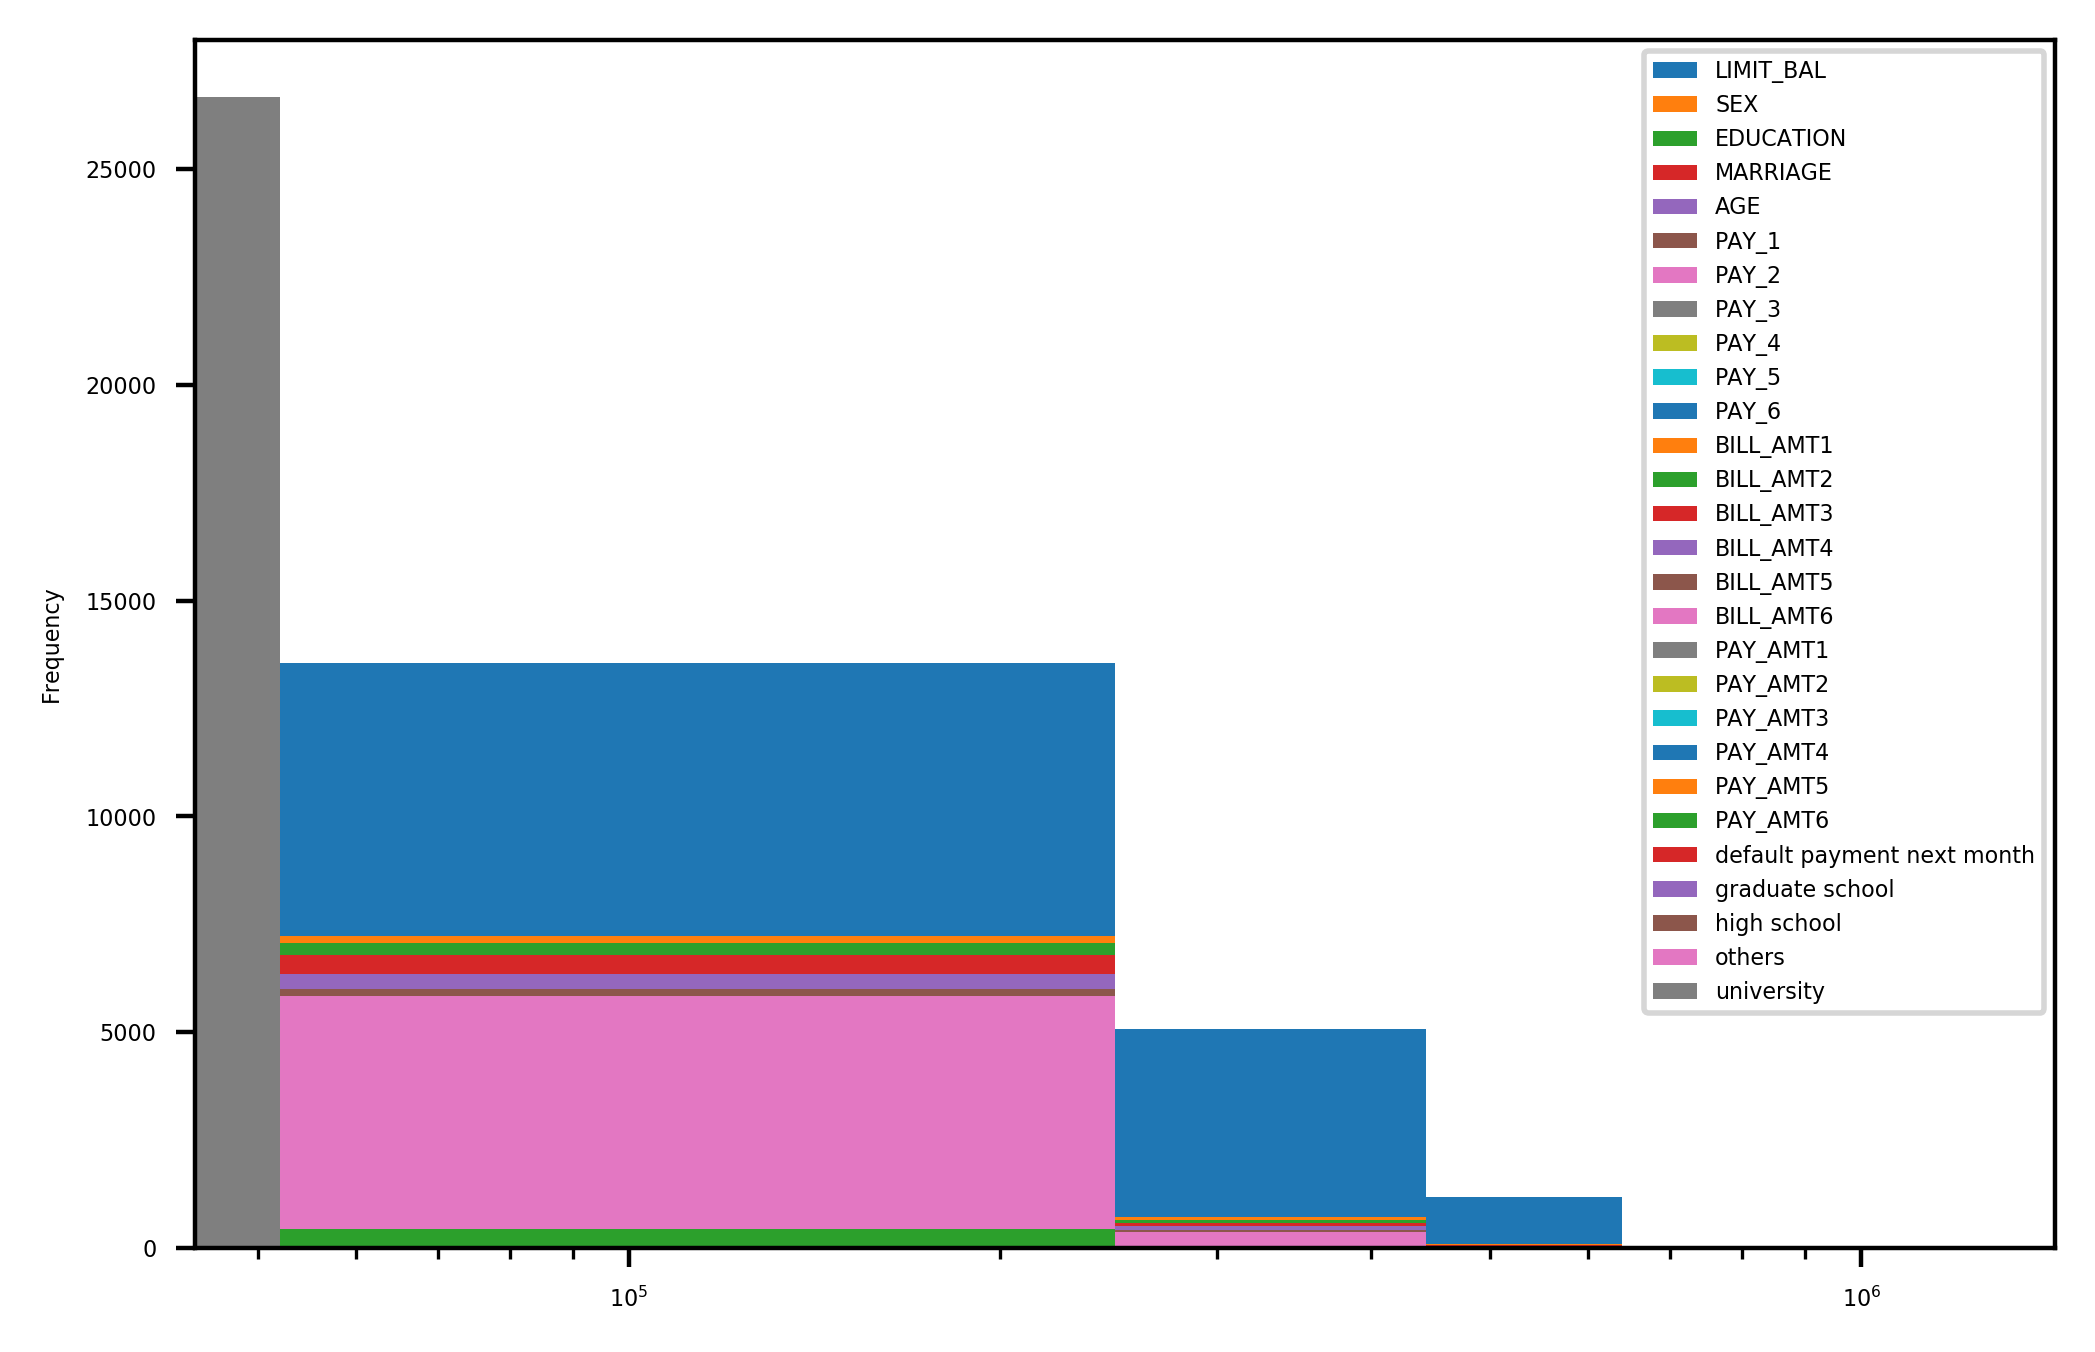

In [42]:
df.plot.hist(bins=8)
plt.xscale('log')
plt.show()